# Modeling with logistic regression

In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reading the data
data=pd.read_csv('Data/DirectMarketing_Cln_Classification.csv')

In [3]:
#shape of the data
data.shape

(1000, 15)

In [4]:
#first five rows of the data
data.head()

,Salary,Children,Catalogs,Middle,Old,Young,Female,Male,Own,Rent,Married,Single,Close,Far,Amt_Spnt_Class
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,Low
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,Med
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,Low
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,High
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,Med


In [5]:
print(data.columns)

Index(['Salary', 'Children', 'Catalogs', 'Middle', 'Old', 'Young', 'Female',
       'Male', 'Own', 'Rent', 'Married', 'Single', 'Close', 'Far',
       'Amt_Spnt_Class'],
      dtype='object')


In [6]:
#checking missing values in the data
data.isnull().sum()

Salary            0
Children          0
Catalogs          0
Middle            0
Old               0
Young             0
Female            0
Male              0
Own               0
Rent              0
Married           0
Single            0
Close             0
Far               0
Amt_Spnt_Class    0
dtype: int64

In [7]:
#seperating independent and dependent variables
X = data.drop(['Amt_Spnt_Class'], axis=1)
y = data['Amt_Spnt_Class']


In [8]:
print(X)

     Salary  Children  Catalogs  Middle  Old  Young  Female  Male  Own  Rent  \
0     47500         0         6       0    1      0       1     0    1     0   
1     63600         0         6       1    0      0       0     1    0     1   
2     13500         0        18       0    0      1       1     0    0     1   
3     85600         1        18       1    0      0       0     1    1     0   
4     68400         0        12       1    0      0       1     0    1     0   
..      ...       ...       ...     ...  ...    ...     ...   ...  ...   ...   
995   19400         1        18       0    0      1       1     0    0     1   
996   40500         1        18       1    0      0       0     1    0     1   
997   44800         0        24       0    1      0       0     1    1     0   
998   79000         2        18       1    0      0       0     1    1     0   
999   53600         1        24       0    0      1       0     1    0     1   

     Married  Single  Close  Far  
0   

In [9]:
print(y)

0       Low
1       Med
2       Low
3      High
4       Med
       ... 
995     Low
996     Med
997     Med
998     Low
999     Med
Name: Amt_Spnt_Class, Length: 1000, dtype: object


In [10]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [11]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 1, stratify=y, test_size=0.2)

In [12]:
# distribution in training set
y_train.value_counts(normalize=True)

Low     0.50125
High    0.25000
Med     0.24875
Name: Amt_Spnt_Class, dtype: float64

In [13]:
# distribution in validation set
y_valid.value_counts(normalize=True)

Low     0.50
Med     0.25
High    0.25
Name: Amt_Spnt_Class, dtype: float64

In [14]:
#shape of training set
X_train.shape, y_train.shape

((800, 14), (800,))

In [15]:
#shape of validation set
X_valid.shape, y_valid.shape

((200, 14), (200,))

In [16]:
#importing decision tree classifier 
from sklearn.linear_model import LogisticRegression

In [17]:
#creating the Logistic regression model
logreg_model = LogisticRegression(random_state=10)

In [18]:
#fitting the model
logreg_model.fit(X_train, y_train)

C:\Users\Torrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Torrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=10, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#checking the training score
logreg_model.score(X_train, y_train)

0.675

In [20]:
#checking the validation score
logreg_model.score(X_valid, y_valid)

0.69

In [21]:
#predictions on validation set
y_pred = logreg_model.predict(X_valid)
y_pred

array(['High', 'Low', 'High', 'Low', 'Med', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'Med', 'Low', 'Low', 'High', 'Low', 'High', 'Med',
       'High', 'Low', 'Low', 'Med', 'High', 'Low', 'Low', 'High', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'High',
       'Low', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'High', 'Low',
       'High', 'Low', 'Med', 'Low', 'High', 'Low', 'High', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Med', 'High',
       'Low', 'Low', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'Low',
       'High', 'High', 'Low', 'Low', 'High', 'Med', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'High', 'Low',
       'Low', 'Low', 'High', 'High', 'Low', 'High', 'Low', 'Low', 'Med',
       'High', 'Med', 'Low', 'Low', 'Low', 'Med', 'Low', 

In [22]:
from sklearn import metrics 

conf_matrix_logreg = pd.DataFrame(metrics.confusion_matrix(y_valid, y_pred, labels=['High','Med','Low']), index = ['actual high', 'actual med', 'actual low'], 
                               columns = ['predicted high', 'predicted med', 'predicted low'])

conf_matrix_logreg

,predicted high,predicted med,predicted low
actual high,44,2,4
actual med,13,7,30
actual low,0,13,87


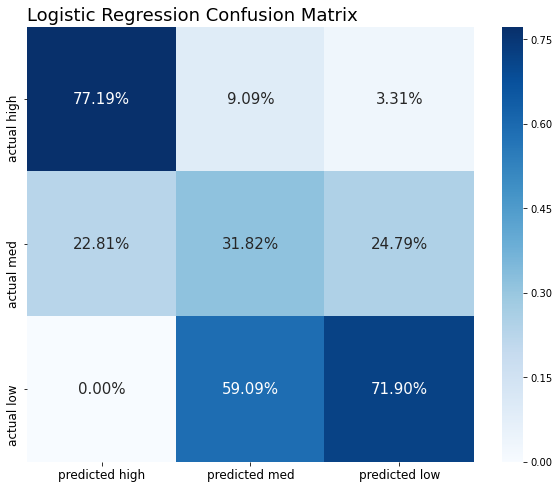

In [23]:
fig, ax = plt.subplots(figsize = (10,8))


sns.heatmap(conf_matrix_logreg/np.sum(conf_matrix_logreg), annot=True, 
            fmt='.2%', cmap='Blues', annot_kws={'size':15})

ax.set_title('Logistic Regression Confusion Matrix', fontsize = 18, loc='left')

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12)

plt.show()

In [24]:
logreg_model.predict_proba(X_valid)

array([[5.93099341e-01, 2.05458805e-01, 2.01441854e-01],
       [2.75756328e-01, 4.29298768e-01, 2.94944904e-01],
       [6.90652082e-01, 1.65626173e-01, 1.43721745e-01],
       [3.48947997e-04, 6.44643303e-01, 3.55007749e-01],
       [3.26306794e-01, 2.78159154e-01, 3.95534051e-01],
       [4.00254188e-01, 4.20051026e-01, 1.79694786e-01],
       [4.79085793e-05, 5.98015643e-01, 4.01936448e-01],
       [6.36980343e-03, 7.41108433e-01, 2.52521764e-01],
       [5.37310497e-01, 2.69107113e-01, 1.93582390e-01],
       [2.73286548e-01, 4.95693372e-01, 2.31020080e-01],
       [3.66854637e-03, 5.19391932e-01, 4.76939522e-01],
       [3.42796896e-01, 3.02119407e-01, 3.55083697e-01],
       [3.25312177e-01, 4.46195819e-01, 2.28492004e-01],
       [2.14162585e-03, 5.64108984e-01, 4.33749390e-01],
       [4.72117685e-01, 2.23172879e-01, 3.04709436e-01],
       [7.14205592e-02, 4.85947183e-01, 4.42632258e-01],
       [6.83126419e-01, 1.81342809e-01, 1.35530772e-01],
       [5.03497082e-02, 4.51728

In [25]:
y_pred_prob = logreg_model.predict_proba(X_valid)[:,1]

In [26]:
y_pred_prob

array([0.20545881, 0.42929877, 0.16562617, 0.6446433 , 0.27815915,
       0.42005103, 0.59801564, 0.74110843, 0.26910711, 0.49569337,
       0.51939193, 0.30211941, 0.44619582, 0.56410898, 0.22317288,
       0.48594718, 0.18134281, 0.4517288 , 0.11314652, 0.52626039,
       0.57162652, 0.38616377, 0.18527711, 0.60777142, 0.5605256 ,
       0.16568782, 0.5761399 , 0.68694863, 0.58645543, 0.55634056,
       0.51434924, 0.48374471, 0.33002731, 0.59897003, 0.5413517 ,
       0.2207946 , 0.53200702, 0.29500463, 0.20842001, 0.24463927,
       0.67711841, 0.48612619, 0.57211924, 0.62637109, 0.59077632,
       0.60928939, 0.59878979, 0.70417465, 0.49571099, 0.25558302,
       0.49551199, 0.18236835, 0.66982887, 0.46211764, 0.42308076,
       0.56912368, 0.47576528, 0.53625177, 0.60867065, 0.62740264,
       0.23958826, 0.12878596, 0.57076785, 0.34661737, 0.51746671,
       0.47035482, 0.57476569, 0.34865852, 0.6238373 , 0.14901746,
       0.48252106, 0.69604436, 0.55276706, 0.57441761, 0.56551

In [27]:
# accuracy score
metrics.accuracy_score(y_valid, y_pred)

0.69

In [28]:
# recall
metrics.recall_score(y_valid, y_pred, average=None)

array([0.88, 0.87, 0.14])

In [29]:
# precision score
metrics.precision_score(y_valid, y_pred, average=None)

array([0.77192982, 0.71900826, 0.31818182])

reference:

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a